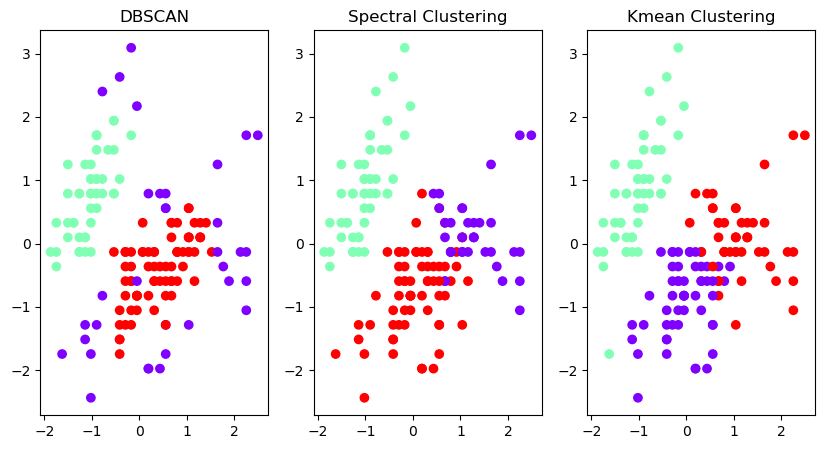

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.cluster import DBSCAN, SpectralClustering
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

# Load the iris dataset
iris = datasets.load_iris()
X = iris.data
y = iris.target

#The lines X = iris.data and y = iris.target are used to load the famous Iris dataset into variables X and y, respectively. 
#Here's a breakdown of what's happening:
#iris.data: This is a NumPy array containing the features (attributes) of the Iris dataset. Each row represents a sample 
#(observation), and each column represents a feature (such as sepal length, sepal width, petal length, and petal width).
#iris.target: This is a NumPy array containing the target variable (class labels) of the Iris dataset. 
#Each element in this array corresponds to the class label of the corresponding sample in iris.data. 
#In the case of the Iris dataset, there are three classes: Iris Setosa, Iris Versicolor, and Iris Virginica.



# Standardize the data
scaler = StandardScaler()
X = scaler.fit_transform(X)

#The line X = scaler.fit_transform(X) applies the scaling operation to the feature matrix X using the fit_transform method 
#of the StandardScaler object. Here's a breakdown of what's happening:

#fit_transform(X): This method computes the mean and standard deviation of each feature in the dataset X and 
#then standardizes the features based on these statistics. It first fits the scaler to the data (computes mean and 
#standard deviation), and then transforms the data by centering and scaling it.

#X: This is the feature matrix, typically containing the input data for a machine learning model. 
#Each row represents a sample (observation), and each column represents a feature (attribute).



# Compute DBSCAN
dbscan = DBSCAN(eps=0.5, min_samples=5) 

#When you specify eps=0.5 in the DBSCAN algorithm, you are setting the maximum distance 
#between points to be considered as neighbors to 0.5 units in the dataset's coordinate system. 

dbscan_labels = dbscan.fit_predict(X) 

#performing clustering using the DBSCAN algorithm on the dataset X and assigning cluster 
#labels to each data point.
#fit_predict(X) is a method call on the dbscan object. The fit_predict method fits the DBSCAN model to the dataset X and 
#then assigns cluster labels to each data point based on the clustering result.
#The resulting dbscan_labels variable contains an array of cluster labels assigned to each data point in the dataset X. 
#Data points that are considered as noise (i.e., not part of any cluster) are typically labeled as -1.

# Compute Spectral Clustering
spectral = SpectralClustering(n_clusters=3, affinity='nearest_neighbors', assign_labels='kmeans')
spectral_labels = spectral.fit_predict(X)

#n_clusters=3: This parameter specifies the number of clusters that the algorithm should aim to find. 
#In this case, it's set to 3, indicating that the algorithm should partition the data into three distinct clusters.

# affinity='nearest_neighbors': This parameter determines how the algorithm measures the similarity between data points. 
#Setting it to 'nearest_neighbors' means that the algorithm will use the nearest neighbors graph to calculate 
#the affinity matrix, where data points are connected to their nearest neighbors.

#assign_labels='kmeans': This parameter determines the method used to assign cluster labels after clustering. 
#Setting it to 'kmeans' means that the K-means algorithm will be applied to the affinity matrix to assign cluster labels.

# initialize k-means clustering with k=3 clusters
kmeans = KMeans(n_clusters=3, init='k-means++', max_iter=300, n_init=10, random_state=0)

#n_clusters=3: This parameter specifies the number of clusters that the algorithm should aim to find. 
#In this case, it's set to 3, indicating that the algorithm should partition the data into three distinct clusters.

#init='k-means++': This parameter determines the method used to initialize the cluster centroids before the algorithm 
#iteratively optimizes them. 'k-means++' is an advanced initialization technique that aims to place the initial centroids 
#far apart from each other, which often leads to better convergence and more accurate clustering results.

#max_iter=300: This parameter specifies the maximum number of iterations that the K-means algorithm will perform in a 
#single run. If convergence is not achieved within this limit, the algorithm stops. Setting it to 300 means that the 
#algorithm will iterate up to 300 times before terminating.

#n_init=10: K-means is sensitive to the initial placement of centroids, so the algorithm is typically run multiple times 
#with different initializations to find the best clustering solution. This parameter controls the number of times the 
#algorithm will be run with different centroid seeds. In this case, it will run the algorithm 10 times with different 
#initializations and choose the one that yields the lowest inertia (sum of squared distances from each point to its nearest 
#centroid).

#random_state=0: This parameter sets the seed for the random number generator used by the algorithm. 
#Setting it to a specific value ensures reproducibility, meaning that running the algorithm with the same parameters 
#and dataset will produce the same results each time, which is useful for debugging and comparison purposes.


# fit the data to the k-means clustering model
kmeans_labels=kmeans.fit_predict(X)

#kmeans is an instance of the KMeans algorithm that has been configured with specific parameters, 
#such as the number of clusters (n_clusters), initialization method (init), maximum number of iterations (max_iter), 
#number of initializations (n_init), and random state (random_state).


#fit_predict(X) is a method call on the kmeans object. The fit_predict method fits the KMeans model to the dataset X and 
#simultaneously assigns cluster labels to each data point based on the clustering result.

#The resulting kmeans_labels variable contains an array of cluster labels assigned to each data point in the dataset X. 
#Each label represents the cluster to which the corresponding data point has been assigned.

# Plot the results

fig, axs = plt.subplots(1, 3, figsize=(10, 5))

#fig: This variable represents the entire figure object, which serves as the container for all the subplots. 
#It encapsulates the entire visual representation, including all the axes (plots) and labels.
#axs: This variable is a NumPy array containing references to each individual subplot (or axis). In this case, 
#since there are 3 subplots arranged in a single row, axs is an array of length 3, where each element corresponds to a subplot.

#plt.subplots(1, 3, figsize=(10, 5)): This function call is from the Matplotlib library and is used to create a figure with 
#multiple subplots. 
#The parameters passed to subplots are as follows:
#1: Number of rows of subplots. Here, it's set to 1, indicating that there is only one row.
#3: Number of columns of subplots. This parameter specifies that there are 3 subplots arranged in a single row.
#figsize=(10, 5): This parameter sets the size of the entire figure. It's a tuple specifying the width and height of the 
#figure in inches. In this case, the width is 10 inches, and the height is 5 inches.


axs[0].scatter(X[:, 0], X[:, 1], c=dbscan_labels, cmap='rainbow')
axs[0].set_title('DBSCAN')

#axs[0]: This accesses the first subplot in the array of subplots (axs). In Matplotlib, you can use this notation to access 
#specific subplots within a figure.

#.scatter(X[:, 0], X[:, 1], c=dbscan_labels, cmap='rainbow'): This method call plots a scatter plot on the selected subplot. 
#The parameters passed to scatter are as follows:

#X[:, 0]: This represents the x-coordinates of the data points to be plotted. 
#It selects all rows (:) of the first column (0) from the dataset X.

#X[:, 1]: This represents the y-coordinates of the data points to be plotted. 
#It selects all rows (:) of the second column (1) from the dataset X.
#c=dbscan_labels: This parameter assigns colors to the data points based on their cluster labels (dbscan_labels). 
#Each unique cluster label will be assigned a different color.
#cmap='rainbow': This parameter specifies the color map to be used for coloring the data points. 
#In this case, the 'rainbow' color map is used, which assigns a different color to each distinct cluster label.

#The line axs[0].set_title('DBSCAN') sets the title of the first subplot (axs[0]) to 'DBSCAN'. 
#Here's a breakdown of what's happening:

#axs[0]: This accesses the first subplot in the array of subplots (axs). 
#In Matplotlib, you can use this notation to access specific subplots within a figure.

#.set_title('DBSCAN'): This method call sets the title of the selected subplot to 'DBSCAN'. 
#The title provides a brief description or label for the subplot, helping viewers understand the content or purpose of the plot.


axs[1].scatter(X[:, 0], X[:, 1], c=spectral_labels, cmap='rainbow')
axs[1].set_title('Spectral Clustering')

axs[2].scatter(X[:, 0], X[:, 1], c=kmeans_labels, cmap='rainbow')
axs[2].set_title('Kmean Clustering')


plt.show()
